In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
data.loc[data["Sex"] == "male", "Sex_encode"] = 0
data.loc[data["Sex"] == "female", "Sex_encode"] = 1

In [20]:
tmp_data = data['Age'].bfill()
tmp_target = data['Survived']

In [27]:
def batch_sampler(**kwargs):
    if kwargs['mode'] == 'train':
        tot = len(kwargs['train_data'])
        batch_size = kwargs['batch_size']
        total_iter = tot // batch_size
        for i in range(total_iter):
            yield (kwargs['train_data'][i * batch_size:(i + 1) * batch_size],
                   kwargs['train_target'][i * batch_size:(i + 1) * batch_size])
    else:
        tot = len(kwargs['test_data'])
        batch_size = kwargs['batch_size']
        total_iter = tot // batch_size
        for i in range(total_iter):
            yield (kwargs['test_data'][i * batch_size:(i + 1) * batch_size],
                   kwargs['test_target'][i * batch_size:(i + 1) * batch_size])


sampler = batch_sampler(mode='train', train_data=tmp_data, train_target=tmp_target, batch_size=32)
L = len(tmp_target) // 32
for i in range(L):
    next(sampler)


w1: -0.19175563310320784, w2: -1.057461467496318, b: -5.496024570855465
Accuracy: 94.80%


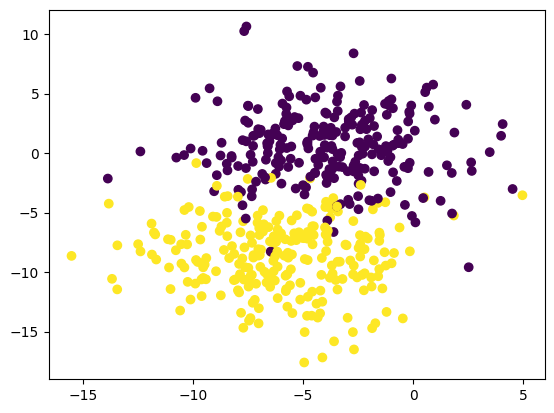

In [34]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate dataset
N = 500
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=3.0, random_state=17)
x1, x2 = X[:, 0], X[:, 1]
plt.scatter(X[:, 0], X[:, 1], c=y)

# Initialize weights and bias
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()


def sigmoid_activation(z):
    return 1.0 / (1 + np.exp(-z))


# Training setup
lossHistory = []
epochs = 400
alpha = 0.01

# Training loop
for epoch in np.arange(epochs):
    sampler = batch_sampler(mode='train', train_data=X, train_target=y, batch_size=2)
    batch_loss = []

    for X_batch, Y_batch in sampler:
        # Forward pass
        preds = sigmoid_activation(w1 * X_batch[:, 0] + w2 * X_batch[:, 1] + b)
        preds = np.clip(preds, 1e-9, 1.)  # clip values for logarithm stability

        # Calculate loss (cross entropy)
        loss = -((Y_batch * np.log(preds) + (1 - Y_batch) * np.log(1 - preds))).mean()
        batch_loss.append(loss)

        # Calculate gradients
        dloss_dz = preds - Y_batch
        w1_deriv = (dloss_dz * X_batch[:, 0]).mean()
        w2_deriv = (dloss_dz * X_batch[:, 1]).mean()
        b_deriv = dloss_dz.mean()

        # Update weights and bias
        w1 -= alpha * w1_deriv
        w2 -= alpha * w2_deriv
        b -= alpha * b_deriv

    lossHistory.append(np.mean(batch_loss))

# Print final weights and bias
print(f"w1: {w1}, w2: {w2}, b: {b}")

# Calculate accuracy on entire dataset
preds_final = sigmoid_activation(w1 * x1 + w2 * x2 + b) > 0.5
accuracy = (preds_final == y).mean()
print(f"Accuracy: {accuracy * 100:.2f}%")
